In [31]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import random

In [26]:

train = pd.read_csv('./features/alpha_45_seconds_with_step_1.csv')
X = train.drop(['64'], axis=1)  # 特征矩阵
y = train['64']  # 目标变量

In [27]:
importance = np.zeros((64,))
degree = 1  ###xgboost和随机森林所占的比重
for i in range(1):
       random_seed = random.randint(1,100)
       
       random_max_depth = random.randint(2,30)
       random_learning_rate = random.randint(1,100)/100
       random_n_estimators = random.randint(20,100)

       rf_model = RandomForestClassifier(n_estimators=8, max_depth=20,min_samples_split=2,min_samples_leaf=1,max_leaf_nodes=2,
                                  min_impurity_decrease=1e-7,random_state=42) 
       rf_model.fit(X,y)
       rf_importance = rf_model.feature_importances_

      ####xgb模型
       # xgboost_model = xgb.XGBClassifier(max_depth=random_max_depth+10,learning_rate=random_learning_rate, min_child_weight=1,
       #          n_estimators=random_n_estimators+150,scale_pos_weight=1,seed=random_seed)
       xgboost_model = xgb.XGBClassifier(n_estimators=200,max_depth=26,learning_rate=0.09, min_child_weight = 5, gamma=0.92,reg_alpha=1,
                scale_pos_weight=1,seed = random_seed)
       xgboost_model.fit(X, y)
       xgb_importance = xgboost_model.feature_importances_
       

       ####累加起来
       importance += degree*xgb_importance + (1-degree)*rf_importance


<class 'numpy.ndarray'>
(64,)


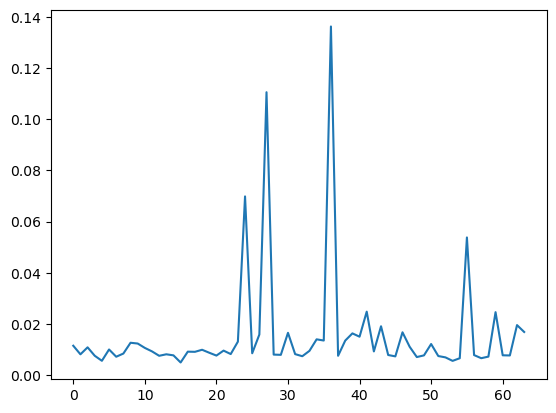

In [28]:
print(type(importance))
print(importance.shape)
plt.plot(importance)
importance_df = pd.DataFrame(importance)
importance_df.T.to_csv('./fea_importance/alpha_rf.csv',index=False)

In [29]:
the_index = np.argsort(-importance)
print('重要性从大到小的顺序是',the_index)
print('它们的重要性值是',importance[the_index])

重要性从大到小的顺序是 [36 27 24 55 41 59 62 43 63 46 30 39 26 40 34 35 38 23  8  9 50  0 47  2
 10  5 18 21 33 11 42 16 17 19 25  7 22 31 13  1 28 29 44 56 60 14 49 61
 20  3 37 12 51 32 45 58  6 48 52 57 54  4 53 15]
它们的重要性值是 [0.13617836 0.1105085  0.06982808 0.05380217 0.02482618 0.02462582
 0.01957386 0.01912083 0.0168896  0.01676314 0.01655898 0.01634275
 0.0158875  0.01504652 0.01401518 0.01355169 0.01352954 0.01311499
 0.01267717 0.01238285 0.01218723 0.01152116 0.01111259 0.01089206
 0.0106686  0.01005765 0.00994427 0.00961457 0.00952063 0.00930996
 0.00929633 0.00920214 0.0091421  0.00878072 0.00857513 0.00846783
 0.00826433 0.00824324 0.00817638 0.0081676  0.00805777 0.00796192
 0.00789817 0.00786961 0.00778437 0.0077607  0.00775426 0.00772265
 0.00767635 0.007602   0.00759207 0.00759008 0.00749365 0.00742204
 0.00736286 0.00726869 0.00722503 0.00710019 0.00697096 0.00665331
 0.00664275 0.0056356  0.00560604 0.00498077]


In [30]:
print(importance_df.T)


         0         1         2         3         4         5         6   \
0  0.011521  0.008168  0.010892  0.007602  0.005636  0.010058  0.007225   

         7         8         9   ...        54        55       56        57  \
0  0.008468  0.012677  0.012383  ...  0.006643  0.053802  0.00787  0.006653   

         58        59        60        61        62       63  
0  0.007269  0.024626  0.007784  0.007723  0.019574  0.01689  

[1 rows x 64 columns]
